In [132]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

Directory = 'C:/Users/billy/Documents/Homework/Data Practicum/Project/DataPracticum1/'

# Quarterly
fileGDP = pd.read_csv(Directory + 'Inputs/GDP.csv', names=['Date', 'GDP'], header=0)

# Monthly
fileRecession = pd.read_csv(Directory + 'Inputs/USREC.csv', names=['Date','Rec'], header=0)
fileCPI = pd.read_csv(Directory + 'Inputs/CPI.csv', 
                      names=['Date', 'CPI'], header=0)

#Yearly
filePCE = pd.read_csv(Directory + 'Inputs/PCE.csv',
                                              names=['Date', 'PCE'],
                                              header=0)

fileInflation = pd.read_csv(Directory + 'Inputs/Inflation.csv',
                            names=['Date', 'Inflation'], header=0)

fileWasteGenerated = pd.read_excel(Directory + 'Inputs/Materials_Municipal_Waste_Stream_1960_2018.xlsx',
                                   sheet_name='Materials generated', index_col=0)
fileWasteRecycled = pd.read_excel(Directory + 'Inputs/Materials_Municipal_Waste_Stream_1960_2018.xlsx',
                                   sheet_name='Materials recycled', index_col=0)
fileWasteLandfilled = pd.read_excel(Directory + 'Inputs/Materials_Municipal_Waste_Stream_1960_2018.xlsx',
                                   sheet_name='Materials landfilled', index_col=0)
fileWasteCombusted = pd.read_excel(Directory + 'Inputs/Materials_Municipal_Waste_Stream_1960_2018.xlsx',
                                   sheet_name='Material combusted', index_col=0)
print("GDP Dates: ", fileGDP.Date.min())
print("CPI Dates: ", fileCPI.Date.min())
print("PCE Dates: ", filePCE.Date.min())
print("Inflation Dates: ", fileInflation.Date.min())

filePCE.Date = pd.to_datetime(filePCE.Date, errors='coerce')
filePCE = filePCE.set_index('Date').resample('M').ffill().reset_index()
fileInflation.Date = pd.to_datetime(fileInflation.Date, errors='coerce')
fileInflation = fileInflation.set_index('Date').resample('M').ffill().reset_index()
fileGDP.Date = pd.to_datetime(fileGDP.Date, errors='coerce')
fileGDP = fileGDP.set_index('Date').resample('M').ffill().reset_index()

fileWasteGenerated = fileWasteGenerated.T
fileWasteGenerated = fileWasteGenerated[['Products - Textiles']].copy()
fileWasteGenerated.reset_index(inplace=True)
fileWasteGenerated.rename(columns={'index':'Date',
                                   'Products - Textiles':'WasteGenerated'},
                          inplace=True)
# =============================================================================
fileWasteGenerated.Date = pd.to_datetime(fileWasteGenerated.Date, format='%Y')
fileWasteGenerated = fileWasteGenerated.set_index('Date').resample('M').ffill().reset_index()

fileWasteRecycled = fileWasteRecycled.T
fileWasteRecycled = fileWasteRecycled[['Products - Textiles']].copy()
fileWasteRecycled.reset_index(inplace=True)
fileWasteRecycled.rename(columns={'index':'Date',
                                  'Products - Textiles':'WasteRecycled'},
                         inplace=True)
fileWasteRecycled.Date = pd.to_datetime(fileWasteRecycled.Date, format='%Y')
# ============================================================================
fileWasteRecycled = fileWasteRecycled.set_index('Date').resample('M').ffill().reset_index()

fileWasteCombusted = fileWasteCombusted.T
fileWasteCombusted = fileWasteCombusted[['Products - Textiles']].copy()
fileWasteCombusted.reset_index(inplace=True)
fileWasteCombusted.rename(columns={'index':'Date',
                                   'Products - Textiles':'WasteCombusted'},
                          inplace=True)
fileWasteCombusted.Date = pd.to_datetime(fileWasteCombusted.Date, format='%Y')
fileWasteCombusted = fileWasteCombusted.set_index('Date').resample('M').ffill().reset_index()


fileWasteLandfilled = fileWasteLandfilled.T
fileWasteLandfilled = fileWasteLandfilled[['Products - Textiles']].copy()
fileWasteLandfilled.reset_index(inplace=True)
fileWasteLandfilled.rename(columns={'index':'Date',
                                    'Products - Textiles':'WasteLandfilled'},
                           inplace=True)
fileWasteLandfilled.Date = pd.to_datetime(fileWasteLandfilled.Date, format='%Y')
fileWasteLandfilled = fileWasteLandfilled.set_index('Date').resample('M').ffill().reset_index()

fileRecession.Date = pd.to_datetime(fileRecession.Date, errors='coerce')
fileRecession = fileRecession.set_index('Date').resample('M').ffill().reset_index()

fileCPI.Date = pd.to_datetime(fileCPI.Date, errors='coerce')
fileCPI = fileCPI.set_index('Date').resample('M').ffill().reset_index()


df = fileRecession.merge(
    fileGDP, how='left').merge(
    fileInflation, how='left').merge(
    filePCE, how='left').merge(
    fileCPI, how='left').merge(
    fileWasteGenerated, how='left').merge(
    fileWasteRecycled, how='left').merge(
    fileWasteCombusted, how='left').merge(
    fileWasteLandfilled, how='left')

df.WasteCombusted = df.WasteCombusted/df.WasteGenerated
df.WasteRecycled = df.WasteRecycled/df.WasteGenerated
df.WasteLandfilled = df.WasteLandfilled/df.WasteGenerated
df['Month'] = df['Date'].dt.strftime("%B")


full = df[(df['Date'] >= '1960-01-31') & (df['Date'] <= '2022-01-31')].copy().reset_index(drop=True)
train_test = df[(df['Date'] >= '1960-01-31') & (df['Date'] <= '2018-01-31')].copy().reset_index(drop=True)
validate = df[(df['Date'] >= '2019-01-31')].copy().reset_index(drop=True)

# =============================================================================
# profile = ProfileReport(train_test, title="Profiling Report")
# profile.to_file("train_test_EDA.html")
# =============================================================================
print(full.columns)


# full.to_csv('full_dataset.csv', index=False)
# full.iloc[:,1:] = full.iloc[:,1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)


# # =============================================================================
# # =============================================================================
# # plt.plot('Date','CPI',data=full)
# # plt.plot('Date','GDP',data=full)
# plt.plot('Date','PCE',data=full)
# # plt.plot('Date','Inflation',data=full)
# # =============================================================================
# plt.plot('Date','WasteRecycled',data=full)
# plt.plot('Date','WasteCombusted',data=full)
# plt.plot('Date','WasteLandfilled',data=full)
# plt.plot('Date','WasteGenerated',data=full, color='black')
# plt.legend(loc='upper left')
# # =============================================================================

# full.to_csv('Normalized Full data set.csv', index=False)
# train_test.to_csv('Train_Test data set.csv', index=False)
# validate.to_csv('validation data set.csv', index=False)

GDP Dates:  1947-01-01
CPI Dates:  2011-12-01
PCE Dates:  1929-01-01
Inflation Dates:  1960-01-01
Index(['Date', 'Rec', 'GDP', 'Inflation', 'PCE', 'CPI', 'WasteGenerated',
       'WasteRecycled', 'WasteCombusted', 'WasteLandfilled', 'Month'],
      dtype='object')


In [16]:
full.corr()

C:\Users\billy\AppData\Local\Temp\ipykernel_23592\300614788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full.corr()


,Rec,GDP,Inflation,PCE,CPI,WasteGenerated,WasteRecycled,WasteCombusted,WasteLandfilled
Rec,1.000000,-0.123751,0.296884,-0.139956,-0.175300,-0.087978,-0.061462,-0.082330,0.074937
GDP,-0.123751,1.000000,-0.403605,0.975588,-0.218157,0.980708,0.943733,0.906130,-0.925715
Inflation,0.296884,-0.403605,1.000000,-0.389517,0.437671,-0.437309,-0.424462,-0.445924,0.440467
PCE,-0.139956,0.975588,-0.389517,1.000000,0.044552,0.932674,0.970824,0.939637,-0.956998
CPI,-0.175300,-0.218157,0.437671,0.044552,1.000000,-0.708652,-0.016625,0.267853,-0.322744
WasteGenerated,-0.087978,0.980708,-0.437309,0.932674,-0.708652,1.000000,0.912249,0.890137,-0.903777
WasteRecycled,-0.061462,0.943733,-0.424462,0.970824,-0.016625,0.912249,1.000000,0.974890,-0.990165
WasteCombusted,-0.082330,0.906130,-0.445924,0.939637,0.267853,0.890137,0.974890,1.000000,-0.996457
WasteLandfilled,0.074937,-0.925715,0.440467,-0.956998,-0.322744,-0.903777,-0.990165,-0.996457,1.000000


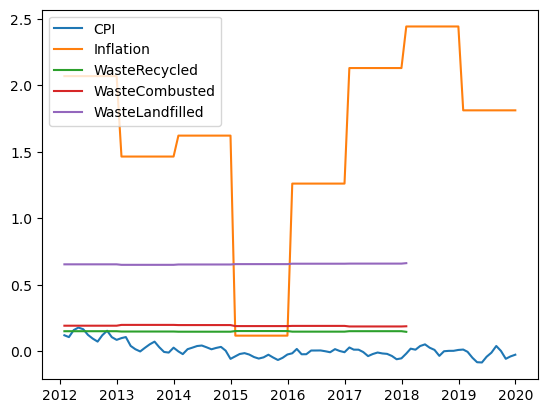

In [27]:
plt.plot('Date','CPI',data=full[(full.Date >= '2012-01-01') & (full.Date < '2020-01-01')])
plt.plot('Date','Inflation',data=full[(full.Date >= '2012-01-01') & (full.Date < '2020-01-01')])
# =============================================================================
plt.plot('Date','WasteRecycled',data=full[(full.Date >= '2012-01-01') & (full.Date < '2020-01-01')])
plt.plot('Date','WasteCombusted',data=full[(full.Date >= '2012-01-01') & (full.Date < '2020-01-01')])
plt.plot('Date','WasteLandfilled',data=full[(full.Date >= '2012-01-01') & (full.Date < '2020-01-01')])
plt.legend(loc='upper left')

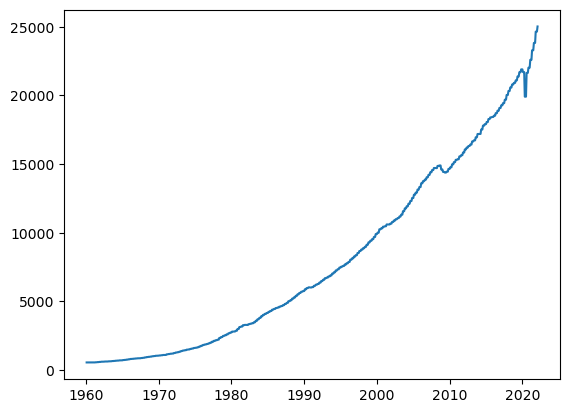

In [4]:
plt.plot('Date','GDP',data=full)

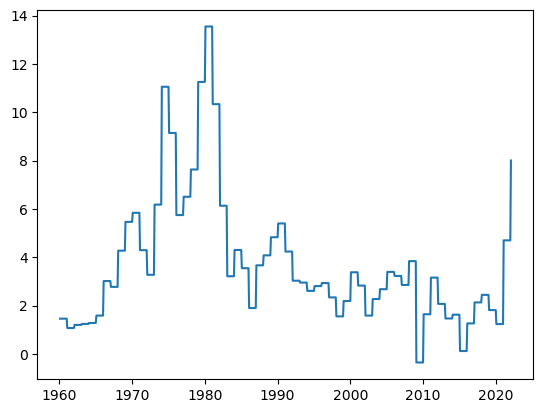

In [5]:
plt.plot('Date','Inflation',data=full)

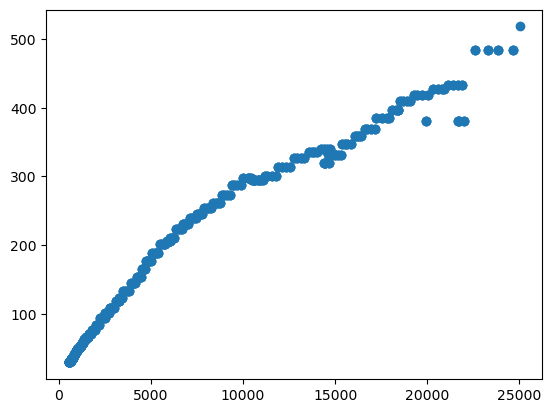

In [6]:
plt.scatter('GDP','PCE',data=full)

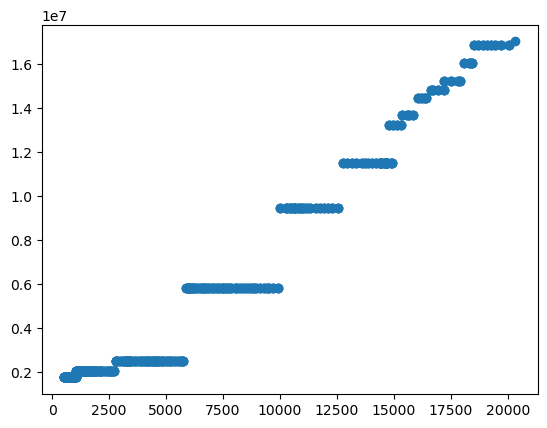

In [7]:
plt.scatter('GDP','WasteGenerated',data=full)

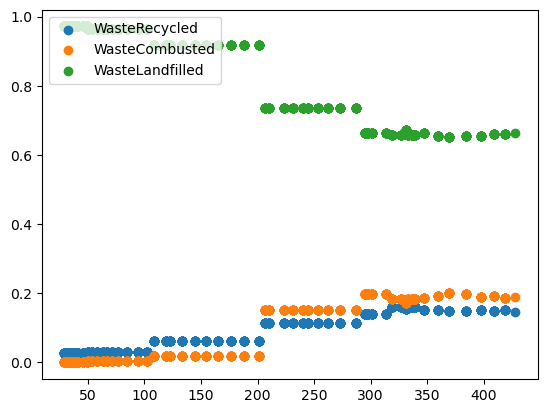

In [8]:
plt.scatter('PCE','WasteRecycled',data=full)
plt.scatter('PCE','WasteCombusted',data=full)
plt.scatter('PCE','WasteLandfilled',data=full)
plt.legend(loc='upper left')

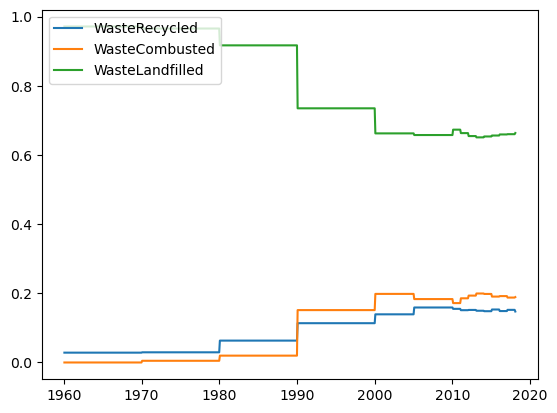

In [9]:
plt.plot('Date','WasteRecycled',data=full)
plt.plot('Date','WasteCombusted',data=full)
plt.plot('Date','WasteLandfilled',data=full)
plt.legend(loc='upper left')

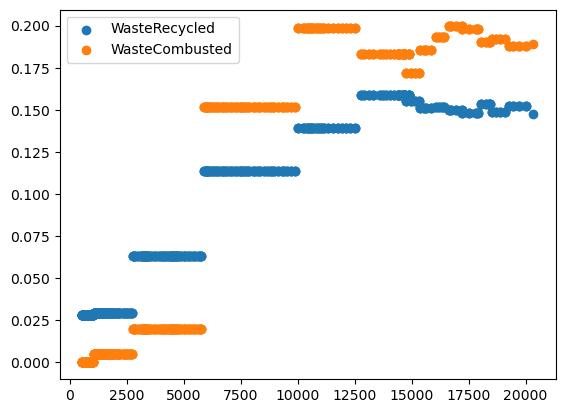

In [10]:
plt.scatter('GDP','WasteRecycled',data=full)
plt.scatter('GDP','WasteCombusted',data=full)
plt.legend(loc='upper left')

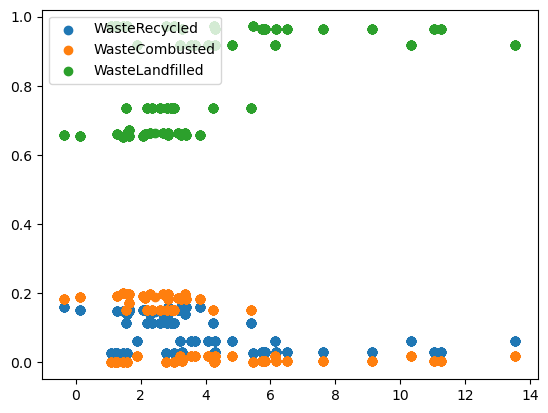

In [11]:
plt.scatter('Inflation','WasteRecycled',data=full)
plt.scatter('Inflation','WasteCombusted',data=full)
plt.scatter('Inflation','WasteLandfilled',data=full)
plt.legend(loc='upper left')

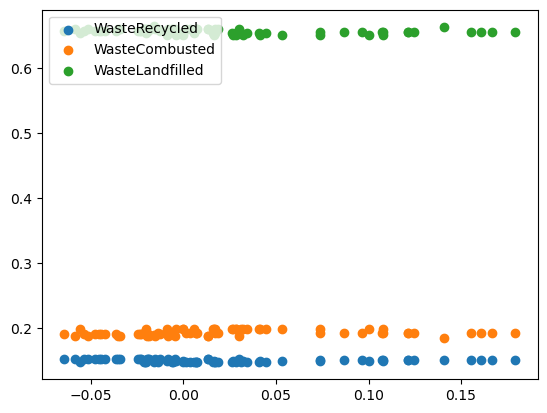

In [31]:
plt.scatter('CPI','WasteRecycled',data=full)
plt.scatter('CPI','WasteCombusted',data=full)
plt.scatter('CPI','WasteLandfilled',data=full)
plt.legend(loc='upper left')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a4595da020>,
 'caps': [<matplotlib.lines.Line2D at 0x2a4595da560>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a4595d9d80>],
 'medians': [<matplotlib.lines.Line2D at 0x2a4595daaa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a4595dad40>],
 'means': []}

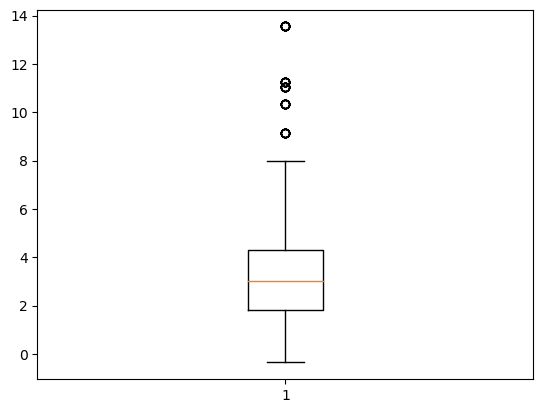

In [13]:
# plt.boxplot('CPI',data=full)
# plt.boxplot('PCE',data=full)
plt.boxplot('Inflation',data=full)


<Axes: xlabel='Month'>

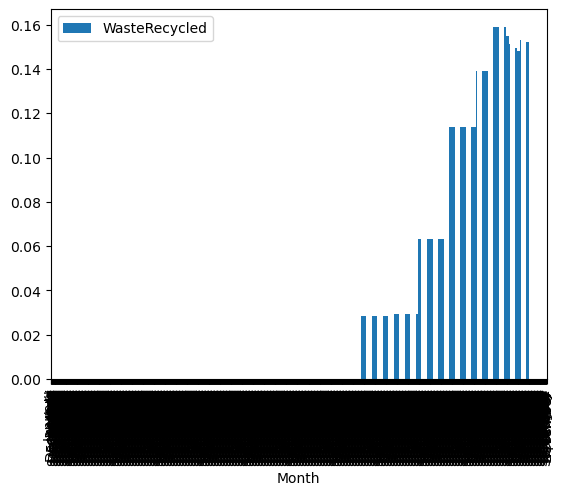

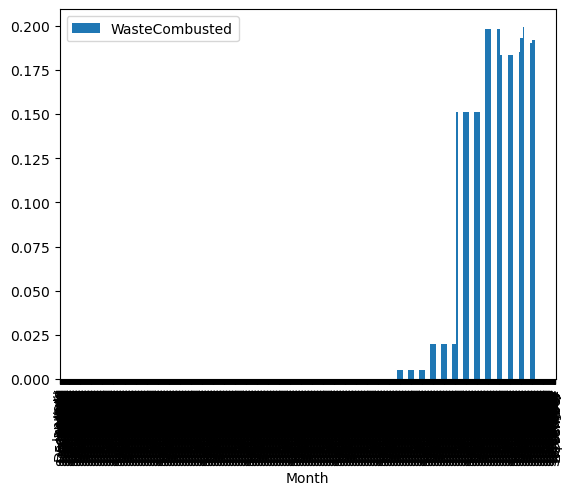

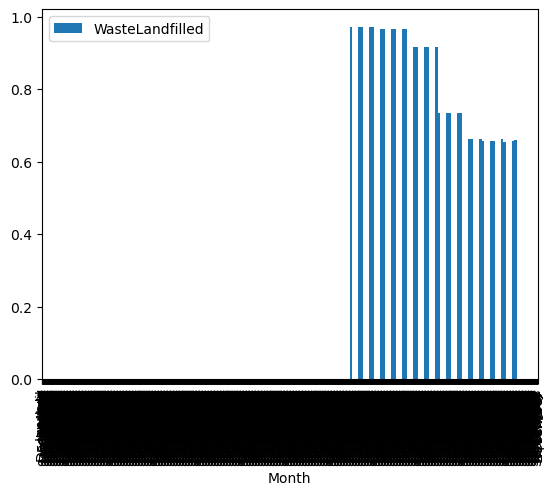

In [24]:
df.plot('Month', 'WasteRecycled', kind='bar')
df.plot('Month', 'WasteCombusted', kind='bar')
df.plot('Month', 'WasteLandfilled', kind='bar')

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
model = LinearRegression()
train_test_2 = train_test[['Date', 'Rec', 'GDP', 'Inflation', 'PCE', 'CPI', 'WasteGenerated']].copy()
train_test_2['Date']=train_test_2['Date'].map(dt.datetime.toordinal)
train_test_2.dropna(inplace=True)
x = train_test_2.iloc[:,:-1]
y = train_test_2.WasteGenerated
model.fit(x, y)

LinearRegression()

In [134]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.9824599569856801
intercept: -1131630909.3719103
coefficients: [ 1.55562148e+03 -2.27662156e-09 -6.87000306e+02 -1.59265183e+05
  3.97682025e+04  2.62347177e+06]


In [135]:
train_test_2['predictedWasteGeneration'] = model.predict(x)
train_test_2['percent difference'] =  (train_test_2['predictedWasteGeneration'] - train_test_2['WasteGenerated']) / train_test_2['WasteGenerated']
train_test_2['difference'] =  train_test_2['predictedWasteGeneration']

In [136]:
train_test_2

,Date,Rec,GDP,Inflation,PCE,CPI,WasteGenerated,predictedWasteGeneration,percent difference,difference
623,734502,0,15842.259,3.156842,347.114,0.141035,13690000.0,1.376387e+07,0.005396,1.376387e+07
624,734533,0,16068.805,2.069337,359.525,0.121436,14480000.0,1.427181e+07,-0.014378,1.427181e+07
625,734562,0,16068.805,2.069337,359.525,0.107737,14480000.0,1.428098e+07,-0.013744,1.428098e+07
626,734593,0,16068.805,2.069337,359.525,0.160564,14480000.0,1.446779e+07,-0.000843,1.446779e+07
627,734623,0,16207.115,2.069337,359.525,0.179326,14480000.0,1.446866e+07,-0.000783,1.446866e+07
...,...,...,...,...,...,...,...,...,...,...
692,736602,0,19692.595,2.130110,419.108,-0.018397,16890000.0,1.699382e+07,0.006147,1.699382e+07
693,736633,0,20037.088,2.130110,419.108,-0.034234,16890000.0,1.676383e+07,-0.007470,1.676383e+07
694,736663,0,20037.088,2.130110,419.108,-0.058796,16890000.0,1.674606e+07,-0.008522,1.674606e+07
695,736694,0,20037.088,2.130110,419.108,-0.051813,16890000.0,1.681261e+07,-0.004582,1.681261e+07


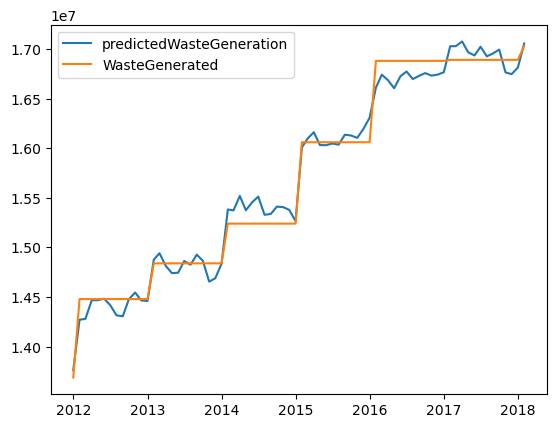

In [137]:
train_test_2['Date'] = train_test_2['Date'].map(dt.datetime.fromordinal)
plt.plot('Date', 'predictedWasteGeneration', data=train_test_2)
plt.plot('Date', 'WasteGenerated', data=train_test_2)
plt.legend(loc='upper left')

In [144]:
# validate['Date'] = validate['Date'].map(dt.datetime.toordinal)
validate_new = validate[['Date', 'Rec', 'GDP', 'Inflation', 'PCE', 'CPI']].copy()
validate_new.dropna(inplace=True)
x_new = validate_new
validate_new['predictedWasteGeneration'] = model.predict(x_new)
validate_new['Date'] = validate_new['Date'].map(dt.datetime.fromordinal)
validate_new

,Date,Rec,GDP,Inflation,PCE,CPI,predictedWasteGeneration
0,2019-01-31,0,21104.133,1.812210,432.901,0.014101,1.746765e+07
1,2019-02-28,0,21104.133,1.812210,432.901,-0.002988,1.746638e+07
2,2019-03-31,0,21104.133,1.812210,432.901,-0.047397,1.739809e+07
3,2019-04-30,0,21384.775,1.812210,432.901,-0.081105,1.716353e+07
4,2019-05-31,0,21384.775,1.812210,432.901,-0.083034,1.720669e+07
5,2019-06-30,0,21384.775,1.812210,432.901,-0.040030,1.736618e+07
6,2019-07-31,0,21694.282,1.812210,432.901,-0.009228,1.728258e+07
7,2019-08-31,0,21694.282,1.812210,432.901,0.040924,1.746238e+07
8,2019-09-30,0,21694.282,1.812210,432.901,0.003824,1.741172e+07
9,2019-10-31,0,21902.390,1.812210,432.901,-0.055414,1.716156e+07


In [145]:
prediction = pd.concat([train_test_2,validate_new])
prediction

,Date,Rec,GDP,Inflation,PCE,CPI,WasteGenerated,predictedWasteGeneration,percent difference,difference
623,2011-12-31,0,15842.259,3.156842,347.114,0.141035,13690000.0,1.376387e+07,0.005396,1.376387e+07
624,2012-01-31,0,16068.805,2.069337,359.525,0.121436,14480000.0,1.427181e+07,-0.014378,1.427181e+07
625,2012-02-29,0,16068.805,2.069337,359.525,0.107737,14480000.0,1.428098e+07,-0.013744,1.428098e+07
626,2012-03-31,0,16068.805,2.069337,359.525,0.160564,14480000.0,1.446779e+07,-0.000843,1.446779e+07
627,2012-04-30,0,16207.115,2.069337,359.525,0.179326,14480000.0,1.446866e+07,-0.000783,1.446866e+07
...,...,...,...,...,...,...,...,...,...,...
32,2021-09-30,0,23828.973,4.697859,484.482,0.094057,NaN,1.891077e+07,NaN,NaN
33,2021-10-31,0,24654.603,4.697859,484.482,0.122502,NaN,1.846641e+07,NaN,NaN
34,2021-11-30,0,24654.603,4.697859,484.482,0.143994,NaN,1.856946e+07,NaN,NaN
35,2021-12-31,0,24654.603,4.697859,484.482,0.162500,NaN,1.866623e+07,NaN,NaN


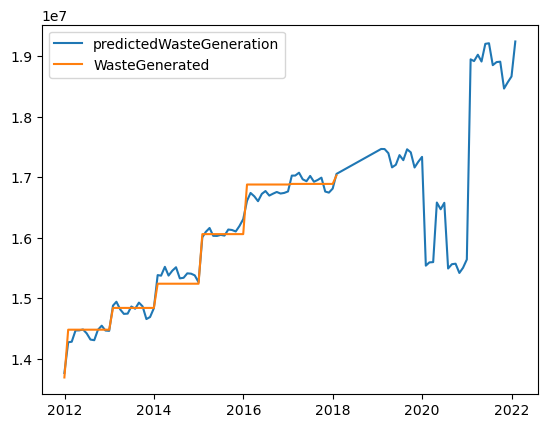

In [146]:
plt.plot('Date', 'predictedWasteGeneration', data=prediction)
plt.plot('Date', 'WasteGenerated', data=prediction)
plt.legend(loc='upper left')